**Development of Average Annual Wages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset link :[Kaggle_Dataset](https://www.kaggle.com/datasets/meeratif/list-of-countries-by-average-wage-monthly-yearly?select=Development+of+average+annual+wages.csv)

In [97]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Development of average annual wages.csv")

In [98]:
data.shape

(38, 5)

In [99]:
data.head()

,Country,2000,2010,2020,2022
0,Iceland *,"57,008","54,268","71,687","79,473"
1,Luxembourg *,"64,217","71,085","74,839","78,310"
2,United States *,"61,132","67,263","77,567","77,463"
3,Switzerland *,"60,768","67,961","69,728","72,993"
4,Belgium *,"60,929","63,295","63,677","64,848"


In [100]:
data.info

<bound method DataFrame.info of              Country    2000    2010    2020    2022
0          Iceland *  57,008  54,268  71,687  79,473
1       Luxembourg *  64,217  71,085  74,839  78,310
2    United States *  61,132  67,263  77,567  77,463
3      Switzerland *  60,768  67,961  69,728  72,993
4          Belgium *  60,929  63,295  63,677  64,848
5          Denmark *  52,019  61,537  66,203  64,127
6          Austria *  57,529  62,831  64,648  63,802
7      Netherlands *  60,063  66,270  67,163  63,225
8        Australia *  48,213  55,536  60,377  59,408
9           Canada *  46,526  52,457  59,160  59,050
10         Germany *  51,344  52,912  60,309  58,940
11  United Kingdom *  44,967  52,455  53,612  53,985
12          Norway *  36,444  47,531  52,415  53,756
13          France *  43,694  49,926  50,550  52,764
14         Ireland *  37,874  52,793  53,651  52,243
15         Finland *  43,073  49,911  51,092  51,836
16     New Zealand *  36,452  44,476  51,417  50,722
17          Sw

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  38 non-null     object
 1   2000     36 non-null     object
 2   2010     38 non-null     object
 3   2020     38 non-null     object
 4   2022     34 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


**Converting the data types to int32**


The issue I encountered was that all the entries in the column were of the 'object' data type. As a result, when I attempted to use the `.describe()` method, I couldn't obtain the basic statistical summary. To address this, I initially attempted to convert all the values in the column to integers using `.astype(int)`. However, I soon realized that I needed to handle missing values, which were represented as 'NaN'. Removing these missing values posed a risk of introducing inconsistencies in the dataset and potentially losing important information.
Furthermore,there are commas and asterisk present, so we must remove them first!

In [102]:

data['Country'] = data['Country'].str.replace('*', '', regex=False)
data.head()


,Country,2000,2010,2020,2022
0,Iceland,"57,008","54,268","71,687","79,473"
1,Luxembourg,"64,217","71,085","74,839","78,310"
2,United States,"61,132","67,263","77,567","77,463"
3,Switzerland,"60,768","67,961","69,728","72,993"
4,Belgium,"60,929","63,295","63,677","64,848"


In [103]:

for columns in ['2000', '2010', '2020', '2022']:
   data[columns] = data[columns].str.replace(',', '', regex=False).astype(float)
data.head()



,Country,2000,2010,2020,2022
0,Iceland,57008.0,54268.0,71687.0,79473.0
1,Luxembourg,64217.0,71085.0,74839.0,78310.0
2,United States,61132.0,67263.0,77567.0,77463.0
3,Switzerland,60768.0,67961.0,69728.0,72993.0
4,Belgium,60929.0,63295.0,63677.0,64848.0


In [104]:
data.isna()

,Country,2000,2010,2020,2022
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [105]:

data.isna().sum()

Country    0
2000       2
2010       0
2020       0
2022       4
dtype: int64

**Missing value handelling**

Filling with row-wise mean

In [106]:
for col in ['2000', '2022']:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [107]:
data.head()

,Country,2000,2010,2020,2022
0,Iceland,57008.0,54268.0,71687.0,79473.0
1,Luxembourg,64217.0,71085.0,74839.0,78310.0
2,United States,61132.0,67263.0,77567.0,77463.0
3,Switzerland,60768.0,67961.0,69728.0,72993.0
4,Belgium,60929.0,63295.0,63677.0,64848.0


In [108]:
data.isna().sum()

Country    0
2000       0
2010       0
2020       0
2022       0
dtype: int64

In [110]:
for col in ['2000', '2010', '2020', '2022']:
    data[col] = data[col].astype(int)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  38 non-null     object
 1   2000     38 non-null     int64 
 2   2010     38 non-null     int64 
 3   2020     38 non-null     int64 
 4   2022     38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

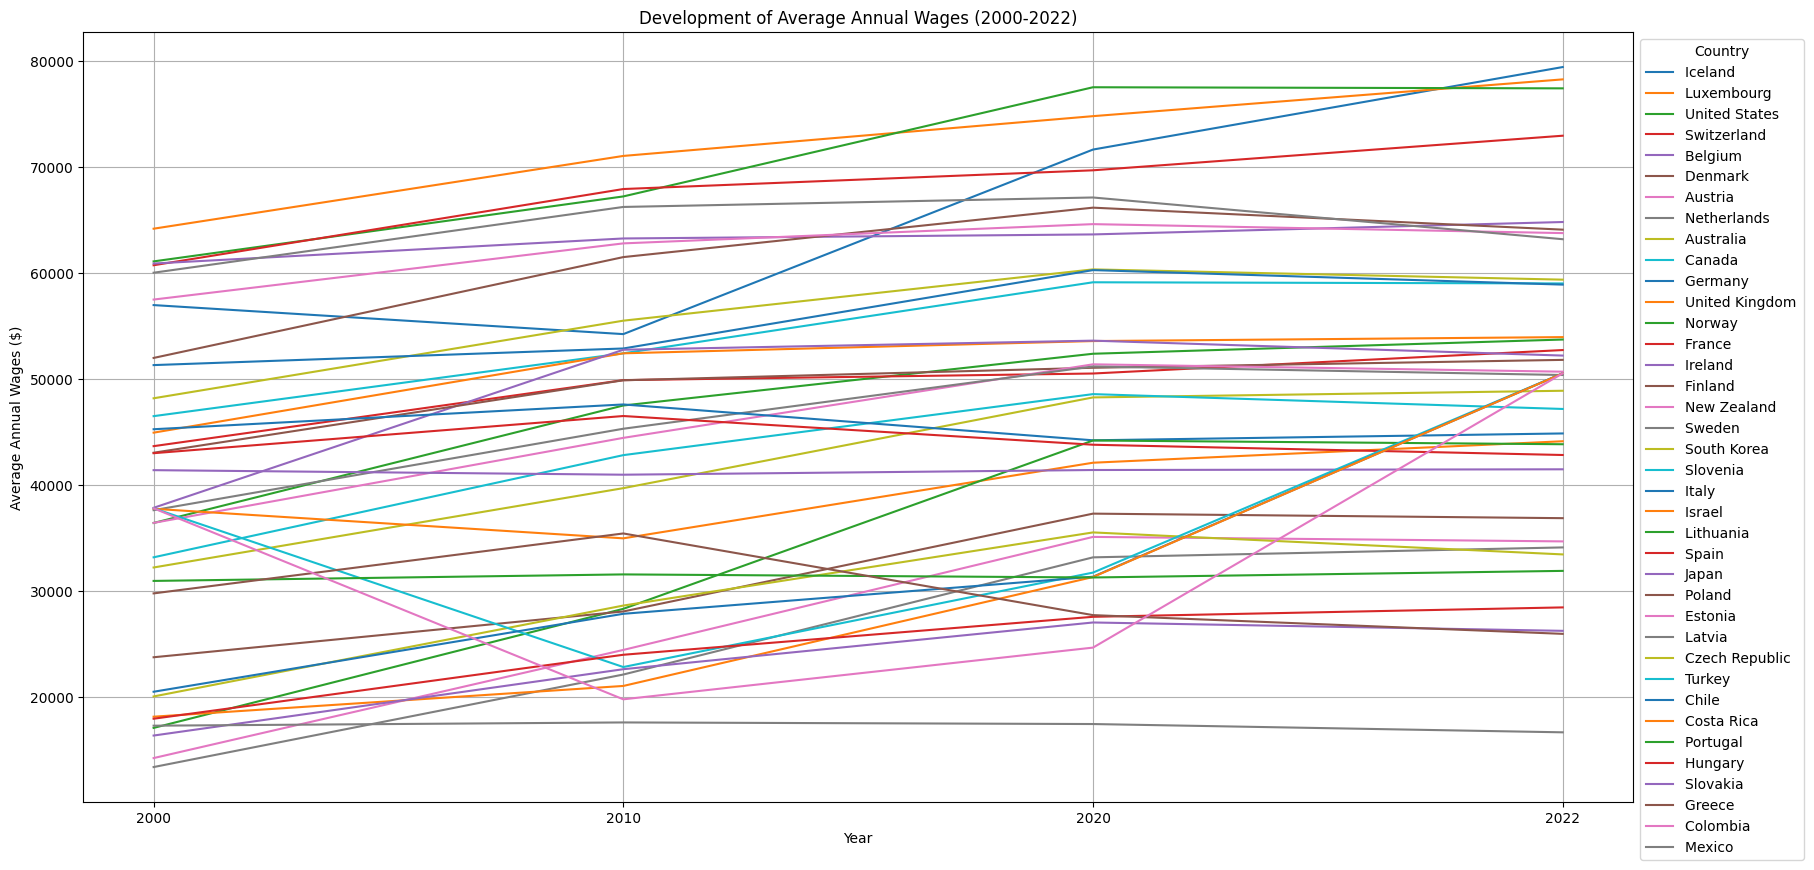

In [115]:
plt.figure(figsize=(20,10))

for i, country in enumerate(data['Country']):
    plt.plot(['2000', '2010', '2020', '2022'], data.loc[i, ['2000', '2010', '2020', '2022']], label=country)

plt.title('Development of Average Annual Wages (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Average Annual Wages ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')
plt.grid(True)
plt.show()


In [116]:
data.describe()

,2000,2010,2020,2022
count,38.000000,38.000000,38.000000,38.000000
mean,38111.710526,42767.026316,47462.947368,49778.000000
std,15198.915235,15824.809503,15599.894859,14919.177865
min,13407.000000,17618.000000,17467.000000,16685.000000
25%,25276.750000,28153.250000,33681.250000,41846.500000
50%,37828.000000,44906.500000,48449.500000,50564.000000
75%,47791.250000,52882.250000,60021.750000,59022.500000
max,64217.000000,71085.000000,77567.000000,79473.000000
